In [1]:
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV

import pandas as pd 
import numpy as np

In [2]:
data_fake = pd.read_csv('C:/Users/foa1s/Desktop/ds/fake news/data/Fake.csv')
data_true = pd.read_csv('C:/Users/foa1s/Desktop/ds/fake news/data/True.csv')

# Fake news preprocessing

In [3]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_fake['True'] = 0

In [5]:
data_fake.shape 

(23481, 5)

In [6]:
data_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [7]:
data_fake = data_fake.drop(['subject'], axis=1)

# True news preprocessing

In [8]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
data_true.shape

(21417, 4)

In [10]:
data_true['True'] = 1

In [11]:
data_true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [12]:
data_true = data_true.drop(['subject'], axis=1)

# Merging data and splitting to test and train

In [13]:
data_all = pd.concat([data_fake, data_true], axis=0, join='outer', ignore_index=True)

In [14]:
data_all

,title,text,date,True
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",0
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017",1


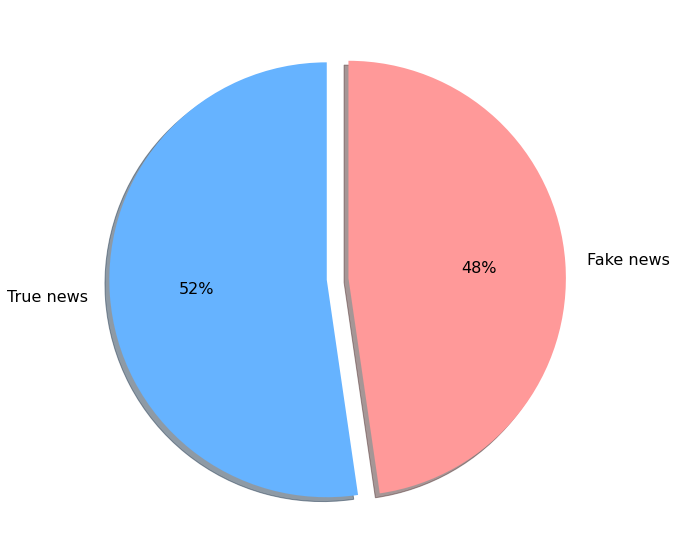

In [15]:
%matplotlib inline
sizes = data_all['True'].value_counts().tolist()
labels = ['True news', 'Fake news']

fig_color, ax_color = plt.subplots()

explode = (0.05, 0.05)

colors = ['#66b3ff', '#ff9999']

fig_color.set_figwidth(10)
fig_color.set_figheight(10)

ax_color.pie(sizes, 
             explode=explode, 
             labels=labels,
             shadow=True, 
             startangle=90,
             textprops={'fontsize': 16},
             colors = colors,
             autopct='%.0f%%'
            )

plt.show()

In [16]:
data_all["title_text"] = data_all["title"].astype(str) + " : " + data_all["text"].astype(str).str.zfill(6)
data_fin = data_all.drop(['title', 'text'], axis=1)

In [47]:
train_df, test_df = train_test_split(data_fin, test_size=1000)
test_df['True'].value_counts()

0    514
1    486
Name: True, dtype: int64

# Natural Language Preprocessing

In [18]:
snowball = SnowballStemmer(language="english")
stop_words = stopwords.words("english")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="english")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [19]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [48]:
features = vectorizer.fit_transform(train_df["title_text"])

# Modeling

In [21]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
]
)

In [49]:
model_pipeline.fit(train_df["title_text"], train_df["True"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001E5A5BD5D30>)),
                ('model', LogisticRegression(random_state=0))])

In [50]:
test_df = test_df.reset_index()
test_df

,index,date,True,title_text
0,8784,"January 13, 2016",0,"Man Without Shirt Was Shivering On Train, Wha..."
1,40067,"October 24, 2017",1,Brazil's top court suspends controversial slav...
2,43319,"September 17, 2017",1,Hamas says ready to hand Gaza to a Palestinian...
3,87,"November 16, 2017",0,Roy Moore Is Asking People To Snitch On The M...
4,37406,"November 24, 2017",1,Death toll in Egypt north Sinai mosque attack ...
...,...,...,...,...
995,24522,"October 25, 2017",1,Highlights of Reuters interview with House Spe...
996,4926,"August 23, 2016",0,Congressional Black Caucus Condemns Trump: He...
997,43385,"September 5, 2017",1,Florida governor vows aggressive probe of Irma...
998,28621,"March 3, 2017",1,U.S. suspends Obama airline transparency revie...


In [54]:
test_df = test_df.drop(['index'], axis=1)

In [58]:
test_df.head(1)

,date,True,title_text
0,"January 13, 2016",0,"Man Without Shirt Was Shivering On Train, Wha..."


In [57]:
model_pipeline.predict([test_df['title_text'][0]])

array([0], dtype=int64)

In [59]:
test = """Ryan Giggs trial told of 'private life that involved a litany of abuse' as case opens Prosecutor tells jury that the 48-year-old was "manipulative" and his life away from football "involved a litany of abuse" on first day of two-week trial
Ryan Giggs had “a private life that involved a litany of abuse” and there was "a much uglier and more sinister side to his character" than the one "idolised by fans", the jury was told on day one of the former Manchester United (https://www.mirror.co.uk/all-about/manchester-united-fc) star’s trial.
The 48-year-old has been accused of controlling and coercive behaviour against ex-girlfriend Kate Greville between August 2017 and November 2020.
He has been charged with assaulting Ms Greville and causing her actual bodily harm at his home in November 2020 and common assault against her younger sister, Emma, in the same alleged incident.
Giggs denies all charges."""

In [60]:
model_pipeline.predict([test])

array([0], dtype=int64)

In [61]:
test2 = """U.S. consumers' inflation outlooks drop sharply, NY Fed survey shows : U.S. consumers' expectations for where inflation will be in a year and three years dropped sharply in July, a New York Federal Reserve survey showed on Monday, indicating U.S. central bankers are winning the fight to keep the outlook for price growth well-anchored as they battle to tame high inflation.
Median expectations for where inflation will be in one year tumbled 0.6 percentage point to 6.2% and the three-year outlook fell 0.4 percentage point to 3.2%, the lowest levels since February of this year and April of last year, respectively."""

In [62]:
model_pipeline.predict([test2])

array([1], dtype=int64)

# Parameters tunning

In [65]:
precision_score(y_true=test_df['True'], y_pred=model_pipeline.predict(test_df['title_text']))

0.9897750511247444

In [66]:
recall_score(y_true=test_df['True'], y_pred=model_pipeline.predict(test_df['title_text']))

0.9958847736625515